# Estimation of the Kappa 1 test statistic

Ref. Sansó et al. *Testing for Changes in the Unconditional Variance of Financial Time Series*, Chapter 2
<br>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot styling
plt.rcParams['figure.figsize'] = 12, 6
sns.set_style('ticks')
sns.set_context('poster')

**Datasets**

In [3]:
# The IBM test set (ref. I&T)
# 17th May 1961 – 2nd November 1962
#ibm = [460,457,452,459,462,459,463,479,493,490,492,498,499,497,496,490,489,478,487,491,487,482,479,478,479,477,479,475,479,476,476,478,479,477,476,475,475,473,474,474,474,465,466,467,471,471,467,473,481,488,490,489,489,485,491,492,494,499,498,500,497,494,495,500,504,513,511,514,510,509,515,519,523,519,523,531,547,551,547,541,545,549,545,549,547,543,540,539,532,517,527,540,542,538,541,541,547,553,559,557,557,560,571,571,569,575,580,584,585,590,599,603,599,596,585,587,585,581,583,592,592,596,596,595,598,598,595,595,592,588,582,576,578,589,585,580,579,584,581,581,577,577,578,580,586,583,581,576,571,575,575,573,577,582,584,579,572,577,571,560,549,556,557,563,564,567,561,559,553,553,553,547,550,544,541,532,525,542,555,558,551,551,552,553,557,557,548,547,545,545,539,539,535,537,535,536,537,543,548,546,547,548,549,553,553,552,551,550,553,554,551,551,545,547,547,537,539,538,533,525,513,510,521,521,521,523,516,511,518,517,520,519,519,519,518,513,499,485,454,462,473,482,486,475,459,451,453,446,455,452,457,449,450,435,415,398,399,361,383,393,385,360,364,365,370,374,359,335,323,306,333,330,336,328,316,320,332,320,333,344,339,350,351,350,345,350,359,375,379,376,382,370,365,367,372,373,363,371,369,376,387,387,376,385,385,380,373,382,377,376,379,386,387,386,389,394,393,409,411,409,408,393,391,388,396,387,383,388,382,384,382,383,383,388,395,392,386,383,377,364,369,355,350,353,340,350,349,358,360,360,366,359,356,355,367,357,361,355,348,343,330,340,339,331,345,352,346,352,357]
#ibm = np.array(ibm, dtype='int64') # Cast as int64 to avoid overflow in kappa1 func
#ibm_returns = np.log(ibm) - np.log(np.roll(ibm, 1))
#ibm_returns = np.delete(ibm_returns, (0), axis=0)
#data = ibm_returns

In [4]:
# The SANSO sets
# IMPORTANT ---- FOLLOW THESE STEPS TO GET clean 1d np.array as input
df = pd.read_csv('sanso_sets.csv') # Contains FTSE / HAN / NIK / SP
ftse = df['FTSE']
ftse = ftse.dropna()
data = ftse.values

**Plot of the data used for analysis**

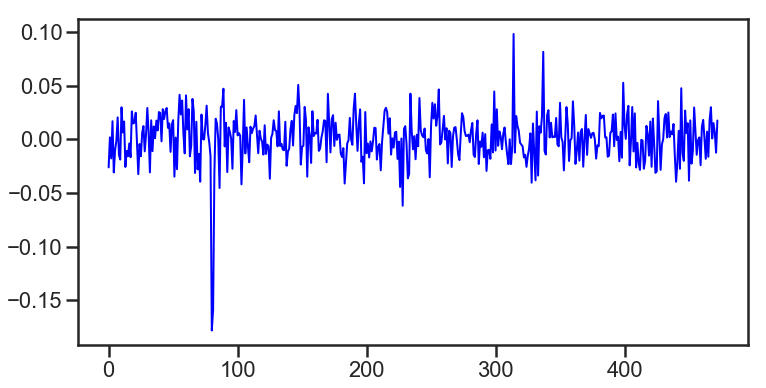

In [5]:
sns.lineplot(data=data, color='blue', lw=2, legend=False)

**The Kappa 1 test calculation**
<br>
GAUSS [source](https://github.com/fokep/Sanso_et_al-ICSS/blob/40d14f93a1289a88781f6f75d416937aca890fd4/icss/icss.src#L343)

In [6]:
def kappa1(data):
    """Calculates the Kappa 1 test value and position
        Adapted from Sanso GAUSS code
    
    Input:
        data    -- 1D numpy array with time series data
    
    Output:
        Array containing
            [0] Bk_plot -- plot values
            [1] Bk_max  -- Kappa 1 - the test value (supremum of |Bk_plot|)
            [2] k_star  -- position of Bk_max in array
        
    """
    # Precur
    Ck = np.cumsum(data**2)              # make 1d-array with cumsums of data^2
    CT = Ck[-1]                          # grab the last value off Ck
    T = len(data)                        # get the length of the time-series
    ks = np.arange(1, (T+1))             # make 1d-array with index from (1:T)
    # These are the new locals in kappa1
    a4 = np.cumsum(data**4)
    a4 = a4[-1] / T
    s2 = CT / T
    c = np.sqrt(a4 - (s2**2))
        
    # Main
    Bk = (Ck - ((ks / T) * CT)) / c
    
    # Output
    Bk_plot = (1/np.sqrt(T)) * Bk        # For plotting
    Bk_max  = np.amax(abs(Bk_plot))      # For test against critical value
    k_star  = np.argmax(abs(Bk))         # For slicing
    
    return Bk_plot, Bk_max, k_star

**Call of the Kappa 1 function**
<br>
The test value and the position of it printed below

In [7]:
result = kappa1(data)

print('Test value: {}'.format(result[1], result[2]))
print('Position: {}'.format(result[2]))

Test value: 1.2090912458475291
Position: 89


**Plot of result**
<br>
Red vertical line indicating position of value

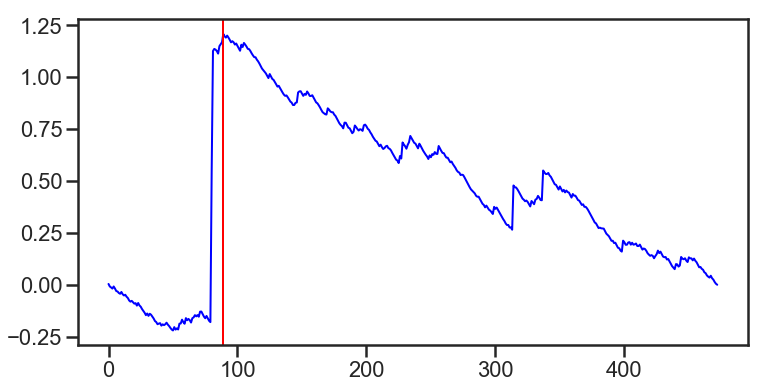

In [8]:
sns.lineplot(data=result[0], color='blue', lw=2, legend=False)
plt.axvline(x=result[2], color='red', lw=2)